In [182]:
%%capture
import pandas as pd
import numpy as np

import plotly.express as px
import plotly.graph_objects as go

import warnings 
warnings.filterwarnings('ignore')

from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
# from xgboost import XGBClassifier
# from lightgbm import LGBMClassifier
# from catboost import CatBoostClassifier

In [183]:
train_data_original = pd.read_csv("train.csv")
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

In [184]:
train_data.shape, test_data.shape

((20758, 18), (13840, 17))

In [185]:
train_data

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,20753,Male,25.137087,1.766626,114.187096,yes,yes,2.919584,3.000000,Sometimes,no,2.151809,no,1.330519,0.196680,Sometimes,Public_Transportation,Obesity_Type_II
20754,20754,Male,18.000000,1.710000,50.000000,no,yes,3.000000,4.000000,Frequently,no,1.000000,no,2.000000,1.000000,Sometimes,Public_Transportation,Insufficient_Weight
20755,20755,Male,20.101026,1.819557,105.580491,yes,yes,2.407817,3.000000,Sometimes,no,2.000000,no,1.158040,1.198439,no,Public_Transportation,Obesity_Type_II
20756,20756,Male,33.852953,1.700000,83.520113,yes,yes,2.671238,1.971472,Sometimes,no,2.144838,no,0.000000,0.973834,no,Automobile,Overweight_Level_II


The attributes related with eating habits are:
| Abbreviation   | Full Form                                 |
|:---------------|:------------------------------------------|
| FAVC           | Frequent consumption of high caloric food |
| FCVC           | Frequency of consumption of vegetables    |
| NCP            | Number of main meals                      |
| CAEC           | Consumption of food between meals         |
| CH20           | Consumption of water daily                |
| CALC           | Consumption of alcohol                    |
| SCC            | Calories consumption monitoring           |
| FAF            | Physical activity frequency               |
| TUE            | Time using technology devices             |
| MTRANS         | Transportation used                       |

In [186]:
import plotly.express as px

def generate_boxplots(df):

    for col in df.columns:
        if col != "id":
            try:
                # Check if the column is numeric to avoid errors with non-numeric data
                if df[col].dtype != 'object':
                    fig = px.box(df, y=col)
                    fig.show()
            except Exception as e:
                print(f"Error generating boxplot for {col}: {e}")

# Call the function with your DataFrame
generate_boxplots(train_data)


In [187]:
def pie_plot(df):
    # Create a list of columns to exclude from the boxplot
    excluded_columns = ['id', 'Height', 'Weight', 'Age', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
    
    for column in df.columns:
        if column not in excluded_columns:
            category_counts = df[column].value_counts()

            fig = go.Figure(data=[go.Pie(labels=category_counts.index, values=category_counts.values, hole=.4)])

            fig.update_layout(title=f"Percentage Distribution of {column}")

            fig.show()

In [188]:
pie_plot(train_data)

In [189]:
import plotly.subplots as sp
import plotly.graph_objects as go
import pandas as pd
import numpy as np

def plot_numeric_distributions(df):
    # Get the list of numeric columns
    numeric_cols = df.select_dtypes(include=[np.number]).columns

    # Determine the layout of the subplots based on the number of numeric columns
    n = len(numeric_cols)
    n_rows = int(np.ceil(np.sqrt(n)))  # Calculate the number of rows needed
    n_cols = n // n_rows if n % n_rows ==  0 else n // n_rows +  1  # Calculate the number of columns needed

    # Create subplots
    fig = sp.make_subplots(rows=n_rows, cols=n_cols)

    # Add a histogram for each numeric column
    for i, col in enumerate(numeric_cols):
        print(i, col)
        row = i // n_cols + 1
        col_index = i % n_cols + 1  # Use a different variable name to represent column index
        fig.add_trace(go.Histogram(x=df[col], name=col), row=row, col=col_index)

    # Update layout to hide unused subplot spaces
    fig.update_layout(showlegend=True)

    # Show the plot
    fig.show()

# Usage:
# Assuming 'df' is your DataFrame
# plot_numeric_distributions(df)


In [190]:
plot_numeric_distributions(train_data_original)

0 id
1 Age
2 Height
3 Weight
4 FCVC
5 NCP
6 CH2O
7 FAF
8 TUE


In [191]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                            20758 non-null  float64
 12  SCC                             

In [192]:
train_data.describe()

,id,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,20758.00000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000
mean,10378.50000,23.841804,1.700245,87.887768,2.445908,2.761332,2.029418,0.981747,0.616756
std,5992.46278,5.688072,0.087312,26.379443,0.533218,0.705375,0.608467,0.838302,0.602113
min,0.00000,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,5189.25000,20.000000,1.631856,66.000000,2.000000,3.000000,1.792022,0.008013,0.000000
50%,10378.50000,22.815416,1.700000,84.064875,2.393837,3.000000,2.000000,1.000000,0.573887
75%,15567.75000,26.000000,1.762887,111.600553,3.000000,3.000000,2.549617,1.587406,1.000000
max,20757.00000,61.000000,1.975663,165.057269,3.000000,4.000000,3.000000,3.000000,2.000000


## Visualizing target variable

In [193]:
train_data_original

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,20753,Male,25.137087,1.766626,114.187096,yes,yes,2.919584,3.000000,Sometimes,no,2.151809,no,1.330519,0.196680,Sometimes,Public_Transportation,Obesity_Type_II
20754,20754,Male,18.000000,1.710000,50.000000,no,yes,3.000000,4.000000,Frequently,no,1.000000,no,2.000000,1.000000,Sometimes,Public_Transportation,Insufficient_Weight
20755,20755,Male,20.101026,1.819557,105.580491,yes,yes,2.407817,3.000000,Sometimes,no,2.000000,no,1.158040,1.198439,no,Public_Transportation,Obesity_Type_II
20756,20756,Male,33.852953,1.700000,83.520113,yes,yes,2.671238,1.971472,Sometimes,no,2.144838,no,0.000000,0.973834,no,Automobile,Overweight_Level_II


In [194]:
# Adding new column
train_data["BMI"] = train_data["Weight"] / (train_data['Height'] ** 2)
train_data_original["BMI"] = train_data["BMI"]

train_data['Gender'] = train_data['Gender'].map({'Male':  1, 'Female':  0})
train_data['FAVC'] = train_data['FAVC'].map({'yes':  1, 'no':  0})
train_data['SCC'] = train_data['SCC'].map({'yes':  1, 'no':  0})
train_data['SMOKE'] = train_data['SMOKE'].map({'yes':  1, 'no':  0})
train_data['family_history_with_overweight'] = train_data['family_history_with_overweight'].map({'yes':  1, 'no':  0})
train_data['CAEC'] = train_data['CAEC'].map({'no':  0, 'Sometimes':  1, 'Frequently': 2, "Always": 3})
train_data['CALC'] = train_data['CALC'].map({'no':  0, 'Sometimes':  1, 'Frequently': 2})
train_data['MTRANS'] = train_data['MTRANS'].map({'Public_Transportation':  0, 'Automobile':  1, 'Walking': 2, "Motorbike": 3})
train_data['NObeyesdad'] = train_data['NObeyesdad'].map({'Overweight_Level_II': 0, 'Normal_Weight': 1, 'Insufficient_Weight': 2, 'Obesity_Type_III': 3, 'Obesity_Type_II': 4, 'Overweight_Level_I': 5, 'Obesity_Type_I': 6})

In [195]:
train_data.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,BMI
0,0,1,24.443011,1.699998,81.669950,1,1,2.000000,2.983297,1,0,2.763573,0,0.000000,0.976473,1,0.0,0,28.259565
1,1,0,18.000000,1.560000,57.000000,1,1,2.000000,3.000000,2,0,2.000000,0,1.000000,1.000000,0,1.0,1,23.422091
2,2,0,18.000000,1.711460,50.165754,1,1,1.880534,1.411685,1,0,1.910378,0,0.866045,1.673584,0,0.0,2,17.126706
3,3,0,20.952737,1.710730,131.274851,1,1,3.000000,3.000000,1,0,1.674061,0,1.467863,0.780199,1,0.0,3,44.855798
4,4,1,31.641081,1.914186,93.798055,1,1,2.679664,1.971472,1,0,1.979848,0,1.967973,0.931721,1,0.0,0,25.599151


In [196]:
correlation_matrix = train_data.corr()

fig = px.imshow(correlation_matrix,
                labels=dict(x="Feature", y="Feature", color="Correlation"),
                x=list(correlation_matrix.columns),
                y=list(correlation_matrix.index),
                color_continuous_scale="RdBu_r",
                text_auto=True,
                title='Heatmap displaying the relationship between the features of the data')

# Update the layout to increase the figure size and set the margins
fig.update_layout(
    width=1600,  # Set the width of the figure
    height=1400,  # Set the height of the figure
    margin=dict(l=50, r=50, b=100, t=100, pad=4),  # Set the margins
    font=dict(size=14)  # Adjust the font size
)

fig.show()

### We can see some info on this plot
height and gender seem to be correlated. MTRANS and Age, family_history_with_overweight and weight seem to have influence on weight too seem to have some correlation too. Same goes for BMI which is correlated with weight, family_history_with_overweight

<Figure size 2400x2880 with 0 Axes>

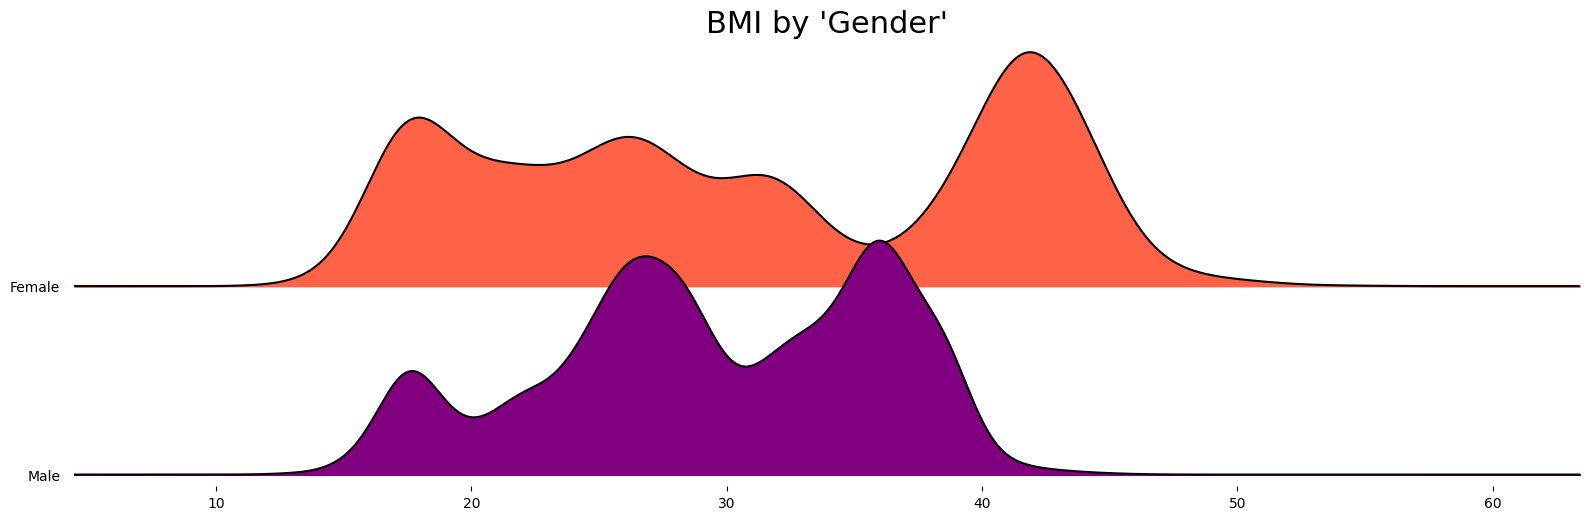

In [222]:
import joypy
import matplotlib.pyplot as plt
varbls = ["BMI"]

plt.figure(figsize=(30,36), dpi= 80)
for i,var in enumerate(varbls):
    joypy.joyplot(train_data_original, column=[var], by="Gender", ylim='own', figsize=(16,5), color=['tomato', 'purple'])
    plt.title(f"{var} by 'Gender'", fontsize=22)
plt.show()

<Figure size 2400x2880 with 0 Axes>

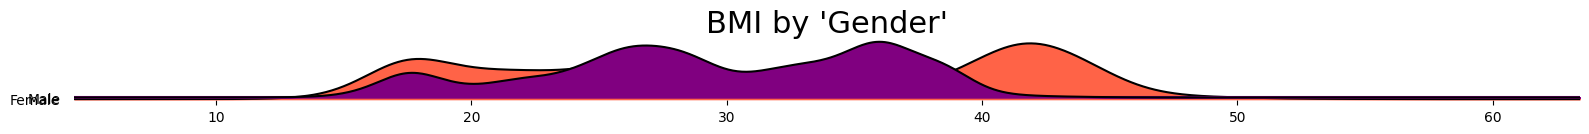

In [223]:
import joypy
import matplotlib.pyplot as plt
varbls = ["BMI"]

plt.figure(figsize=(30,36), dpi= 80)
for i,var in enumerate(varbls):
    joypy.joyplot(train_data_original, column=[var], by="Gender", ylim='own', figsize=(16, 1.2), color=['tomato', 'purple'])
    plt.title(f"{var} by 'Gender'", fontsize=22)
plt.show()

In [198]:
plot_bmi_vs_target(train_data_original)

<Figure size 2400x2880 with 0 Axes>

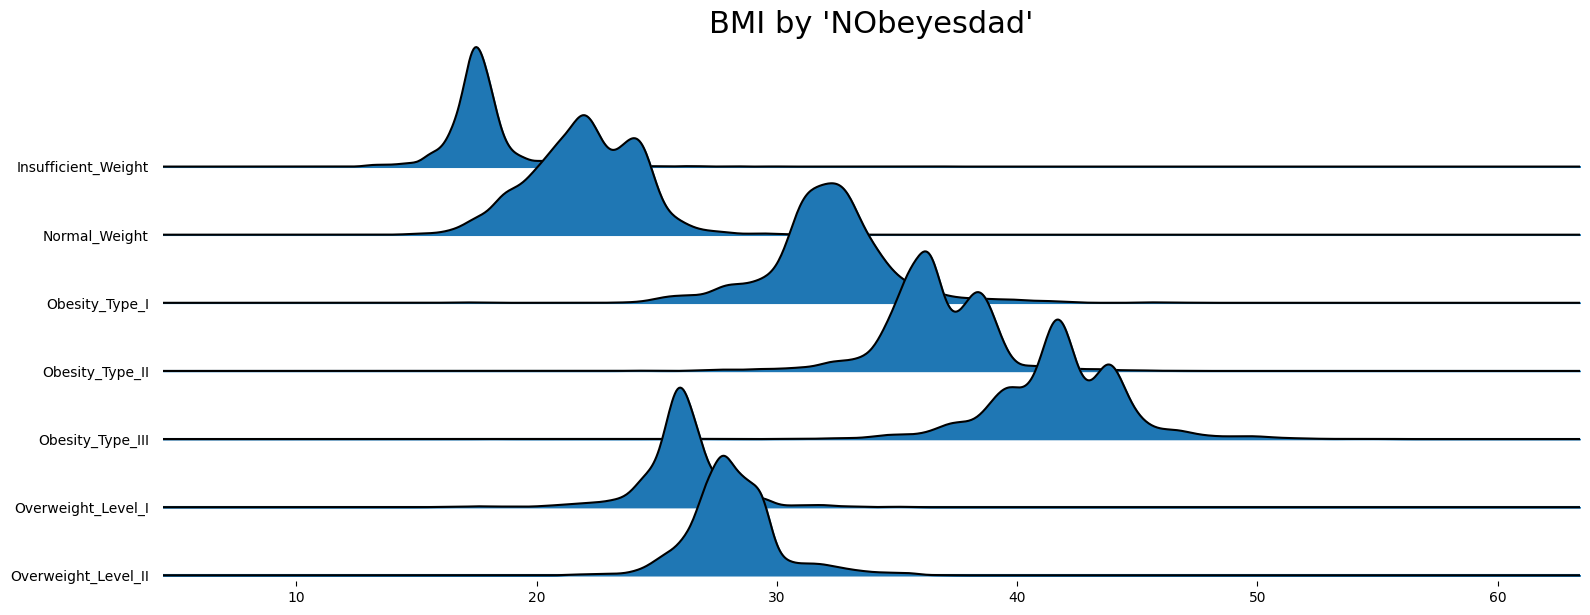

In [227]:
import joypy
import matplotlib.pyplot as plt

varbls = ["BMI"]

plt.figure(figsize=(30,36), dpi=80)
for i, var in enumerate(varbls):
    joypy.joyplot(train_data_original, column=[var], by="NObeyesdad", ylim='own', figsize=(16, 6))
    plt.title(f"{var} by 'NObeyesdad'", fontsize=22)
plt.show()


In [228]:
def plotly_joyplot(data, column, by, title):
    fig = px.histogram(data, x=column, color=by, marginal="violin", 
                       histnorm='probability density', barmode='overlay',
                       category_orders={by: sorted(data[by].unique())})
    
    fig.update_layout(title=title, xaxis_title=column, yaxis_title='Density')
    
    fig.show()

# Example usage
plotly_joyplot(train_data_original, column='BMI', by='NObeyesdad', title='BMI by NObeyesdad')

In [209]:
import plotly.graph_objects as go
import pandas as pd

def plot_distribution_by_column(df, target_column='NObeyesdad', other_column='gender'):
    # Assuming 'df' is your DataFrame and it has columns 'NObeyesdad' and 'gender'
    # Filter the DataFrame by gender
    male_data = df[df[other_column] == 'male']
    female_data = df[df[other_column] == 'female']

    # Get the unique categories and their counts for each gender
    male_categories = male_data[target_column].value_counts()
    female_categories = female_data[target_column].value_counts()

    # Create a bar plot for each gender
    fig = go.Figure()
    fig.add_trace(go.Bar(name='Male', x=male_categories.index, y=male_categories.values))
    fig.add_trace(go.Bar(name='Female', x=female_categories.index, y=female_categories.values))

    # Customize the layout
    fig.update_layout(
        title="Distribution of NObeyesdad Among Genders",
        xaxis_title="NObeyesdad Category",
        yaxis_title="Count",
        barmode='group'
    )

    # Show the plot
    fig.show()

# Usage:
# Assuming 'df' is your DataFrame with columns 'NObeyesdad' and 'gender'
# plot_distribution_by_gender(df)


In [210]:
plot_distribution(train_data_original)

In [ ]:
def plot_mean_bmi_per_category(df, category_column='NObeyesdad', bmi_column='BMI'):
    # Group the data by the category column and calculate the mean BMI for each group
    mean_bmis = df.groupby(category_column)[bmi_column].mean().reset_index()

    # Create a grouped bar chart
    fig = go.Figure(data=go.Bar(
        x=mean_bmis[category_column],
        y=mean_bmis[bmi_column],
        text=mean_bmis[bmi_column],
        textposition='auto'
    ))

    # Customize the layout
    fig.update_layout(
        title="Mean BMI Per Category",
        xaxis_title=category_column,
        yaxis_title="Mean BMI",
        barmode='group'
    )

    # Show the plot
    fig.show()


In [ ]:
plot_mean_bmi_per_category(train_data_original)

In [ ]:
train_data_original.groupby('NObeyesdad')['BMI'].describe().reset_index().style.background_gradient()

,NObeyesdad,count,mean,std,min,25%,50%,75%,max
0,Insufficient_Weight,2523.000000,17.583619,1.388408,12.868541,17.025801,17.506390,18.025957,36.778115
1,Normal_Weight,3082.000000,22.000999,2.194097,14.631670,20.568937,22.038567,23.661439,32.882414
2,Obesity_Type_I,2910.000000,32.154649,2.513458,16.597443,31.020408,32.121386,33.298647,46.805188
3,Obesity_Type_II,3248.000000,36.521958,2.112538,24.048460,35.436970,36.378753,38.023475,46.222483
4,Obesity_Type_III,4046.000000,41.781745,2.670789,18.178670,40.371119,41.750620,43.615233,54.997991
5,Overweight_Level_I,2427.000000,26.059270,1.768697,15.761880,25.390625,25.963757,26.672763,35.555556
6,Overweight_Level_II,2522.000000,28.192491,1.835666,21.513859,27.080170,28.020083,29.086346,36.741456


In [ ]:
train_data_original.groupby('MTRANS')['BMI'].describe().reset_index().style.background_gradient()

,MTRANS,count,mean,std,min,25%,50%,75%,max
0,Automobile,3534.000000,29.902409,6.049544,13.291588,26.229965,29.411765,35.127846,45.833976
1,Bike,32.000000,24.460828,4.350608,17.110021,21.827111,24.412259,25.951557,38.530612
2,Motorbike,38.000000,25.461003,6.410307,13.007284,21.812021,24.489796,28.337372,41.748577
3,Public_Transportation,16687.000000,30.518112,8.750429,12.868541,23.530366,30.002561,38.258559,54.997991
4,Walking,467.000000,23.723854,4.432391,13.007284,20.125984,24.221453,26.851852,36.897959
